# Unit 5 - Financial Planning

In [65]:
# Import needed libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from pprint import pprint
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [66]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [67]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [68]:
# Get BTC data
response= requests.get(btc_url)

# format data as JSON
btc_data= response.json()

# Use pprint to better visualize data
pprint(btc_data, indent=2)

{ 'data': { '1': { 'circulating_supply': 19428500,
                   'id': 1,
                   'last_updated': 1689275998,
                   'max_supply': 21000000,
                   'name': 'Bitcoin',
                   'quotes': { 'USD': { 'market_cap': 608756781396,
                                        'percent_change_1h': 0.147799834344879,
                                        'percent_change_24h': 2.77648319962787,
                                        'percent_change_7d': 3.40397733370452,
                                        'percentage_change_1h': 0.147799834344879,
                                        'percentage_change_24h': 2.77648319962787,
                                        'percentage_change_7d': 3.40397733370452,
                                        'price': 31314.0,
                                        'volume_24h': 19410062807}},
                   'rank': 1,
                   'symbol': 'BTC',
                   'total_supply': 19428500,


In [69]:
# Select btc price and store as variable
btc_price= btc_data["data"]["1"]["quotes"]["USD"]["price"]
btc_price

31314.0

In [70]:
# Get eth data
response_eth= requests.get(eth_url)

# format data as JSON
eth_data= response_eth.json()
print(type(eth_data))

# Use pprint to better visualize data
pprint(eth_data, indent=2)


<class 'dict'>
{ 'data': { '1027': { 'circulating_supply': 120206569,
                      'id': 1027,
                      'last_updated': 1689275999,
                      'max_supply': 120206569,
                      'name': 'Ethereum',
                      'quotes': { 'USD': { 'market_cap': 239028557381,
                                           'percent_change_1h': -0.897399236240815,
                                           'percent_change_24h': 5.42465023017158,
                                           'percent_change_7d': 5.16814646838103,
                                           'percentage_change_1h': -0.897399236240815,
                                           'percentage_change_24h': 5.42465023017158,
                                           'percentage_change_7d': 5.16814646838103,
                                           'price': 1985.91,
                                           'volume_24h': 16183386590}},
                      'rank': 2,
             

In [71]:
# # Select eth price and store as variable
eth_price= eth_data["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

1985.91

In [72]:
# Compute current value of my crpto (asstes * price)
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37576.80
The current value of your 5.3 ETH is $10525.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [73]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [74]:
# Load .env enviroment variables
# go to my_keys.env file and enter your Alpaca Api Key and Alpaca Secret Key
load_dotenv("my_keys.env")

True

In [75]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object using ".REST"
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [76]:
# type today's date and format date as ISO format
today = pd.Timestamp("2023-07-12", tz="America/New_York").isoformat()
today


'2023-07-12T00:00:00-04:00'

In [77]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get Closing Price for SPY and AGG using Alpaca ".get_bars" function and transform response to Dataframe
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

#Display data
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-07-12 04:00:00+00:00,97.51,97.8499,97.45,97.80,7188297,23477,97.718218,AGG
2023-07-12 04:00:00+00:00,446.39,447.4799,444.91,446.02,91494187,582590,445.659196,SPY


In [78]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis='columns')
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis='columns')

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                             \
                            open     high    low close   volume trade_count   
timestamp                                                                     
2023-07-12 04:00:00+00:00  97.51  97.8499  97.45  97.8  7188297       23477   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-07-12 04:00:00+00:00  97.718218  446.39  447.4799  444.91  446.02   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-07-12 04:00:00+00:00  91494187      582590  445.659196

In [80]:
# Set variables for closing price and assign their value
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.8
Current SPY closing price: $446.02


In [81]:
# Compute the current value of shares (Price * number of shares)
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22301.00
The current value of your 200 AGG shares is $19560.00


### Savings Health Analysis

In [82]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data: 
shares = my_agg_value + my_spy_value
crypto = my_btc_value + my_eth_value

# Create savings DataFrame
df_savings = pd.DataFrame(data=[crypto, shares], index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,48102.123
shares,41861.000


<Axes: title={'center': 'Personal Savings Composition'}, ylabel='amount'>

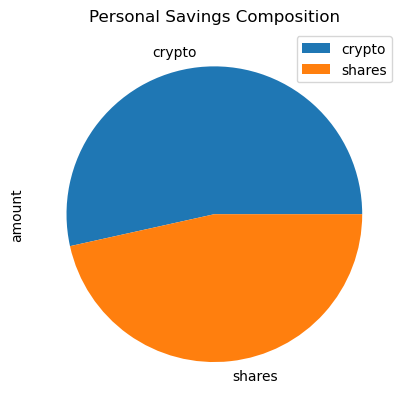

In [83]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [84]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings= shares + crypto

# Validate saving health using conditionals
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund-total_savings} from reaching your goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [85]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-12', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG (tickers variable and timeframe defined previously)
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_data = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis='columns')
SPY_data = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis='columns')

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_data, SPY_data],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2018-07-12 04:00:00+00:00  106.26  106.420  106.2600  106.41  2145797   
2018-07-13 04:00:00+00:00  106.44  106.520  106.4400  106.51  2235587   
2018-07-16 04:00:00+00:00  106.35  106.400  106.2434  106.39  2116689   
2018-07-17 04:00:00+00:00  106.40  106.450  106.2900  106.35  2964110   
2018-07-18 04:00:00+00:00  106.36  106.385  106.2700  106.32  1760878   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-07-12 04:00:00+00:00        8401  106.365689  278.28  279.430  277.60   
2018-07-13 04:00:00+00:00        9524  106.486794  279.17  279.930  278.66   
2018-07-16 04:00:00+00:00        8807  106.343343  279.64  279.803  278.84   
2018-07-17 04:00:00+00:00       10450  106.371231  278.47  280.910  278.41   
2018-07-18 04:00:00+00:00       14103  106.336028  280.56  281.180  280.06   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-07-12 04:00:00+00:00  279.29  60185206      236263  278.725115  
2018-07-13 04:00:00+00:00  279.56  48259487      206152  279.527779  
2018-07-16 04:00:00+00:00  279.39  48722138      177350  279.312325  
2018-07-17 04:00:00+00:00  280.43  52890500      216883  280.027102  
2018-07-18 04:00:00+00:00  281.06  45335061      169756  280.805105

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use 500 runs and 40(AGG)/60(SPY) portfolio.
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [39]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2018-07-12 04:00:00+00:00  106.26  106.420  106.2600  106.41  2145797   
2018-07-13 04:00:00+00:00  106.44  106.520  106.4400  106.51  2235587   
2018-07-16 04:00:00+00:00  106.35  106.400  106.2434  106.39  2116689   
2018-07-17 04:00:00+00:00  106.40  106.450  106.2900  106.35  2964110   
2018-07-18 04:00:00+00:00  106.36  106.385  106.2700  106.32  1760878   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-12 04:00:00+00:00        8401  106.365689          NaN  278.28   
2018-07-13 04:00:00+00:00        9524  106.486794     0.000940  279.17   
2018-07-16 04:00:00+00:00        8807  106.343343    -0.001127  279.64   
2018-07-17 04:00:00+00:00       10450  106.371231    -0.000376  278.47   
2018-07-18 04:00:00+00:00       14103  106.336028    -0.000282  280.56   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-07-12 04:00:00+00:00  279.430  277.60  279.29  60185206      236263   
2018-07-13 04:00:00+00:00  279.930  278.66  279.56  48259487      206152   
2018-07-16 04:00:00+00:00  279.803  278.84  279.39  48722138      177350   
2018-07-17 04:00:00+00:00  280.910  278.41  280.43  52890500      216883   
2018-07-18 04:00:00+00:00  281.180  280.06  281.06  45335061      169756   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-12 04:00:00+00:00  278.725115          NaN  
2018-07-13 04:00:00+00:00  279.527779     0.000967  
2018-07-16 04:00:00+00:00  279.312325    -0.000608  
2018-07-17 04:00:00+00:00  280.027102     0.003722  
2018-07-18 04:00:00+00:00  280.805105     0.002247

In [40]:
# Import warnings to ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [41]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.976984,1.012394,0.979164,1.006227,1.005625,1.004334,0.998482,0.992711,1.000680,1.004810,...,0.995185,0.996197,1.001947,0.988424,0.998810,1.001187,1.017290,0.997364,0.998096,0.992390
2,0.967687,1.022591,0.979447,1.011915,1.004653,0.998281,0.998826,1.006067,1.003262,0.992520,...,0.985618,0.993503,1.014520,0.987225,1.008328,1.003217,1.004740,0.996958,0.987014,1.006101
3,0.958656,1.021306,0.960757,1.027235,1.007913,1.005139,1.001220,1.005924,1.004815,1.003118,...,0.985305,0.989919,1.013952,0.986575,1.008337,1.006876,1.015228,1.002042,0.990102,0.999573
4,0.954225,1.012482,0.955512,1.023657,1.001956,1.007713,1.009375,1.004398,0.998233,1.015622,...,0.983814,0.982461,1.023400,0.997127,1.008654,1.010992,1.019340,1.012797,0.987056,0.988342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.652703,24.640945,3.403129,3.638501,8.674278,5.593133,6.094333,6.246883,4.450744,6.461419,...,8.096271,3.409789,20.961429,6.162061,2.522280,3.442669,3.076748,10.441304,3.280403,1.894207
7557,5.627656,24.999441,3.400382,3.656091,8.671095,5.595470,6.108657,6.345198,4.428973,6.485071,...,8.220756,3.419099,20.617622,6.169488,2.514502,3.408860,3.115236,10.404301,3.320881,1.894799
7558,5.635163,24.646037,3.401926,3.632623,8.632272,5.542675,6.105663,6.263002,4.368110,6.515287,...,8.118173,3.400686,20.533481,6.121504,2.514995,3.397956,3.114509,10.373981,3.305123,1.893365
7559,5.644708,24.561209,3.438824,3.637140,8.462235,5.513688,6.104803,6.217130,4.360991,6.506265,...,8.109069,3.436233,20.251493,6.187802,2.509364,3.419937,3.106183,10.391250,3.285401,1.869600


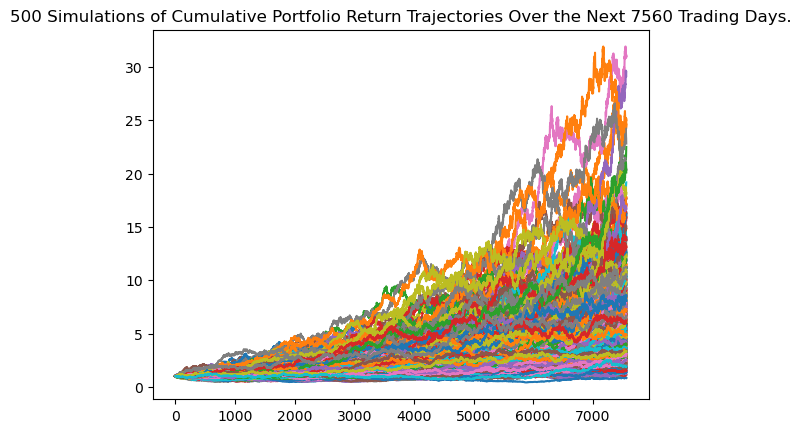

In [42]:
# Plot simulation outcomes
line_plot = MC_thirty_years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirthy_year_sim_plot.png", bbox_inches="tight")

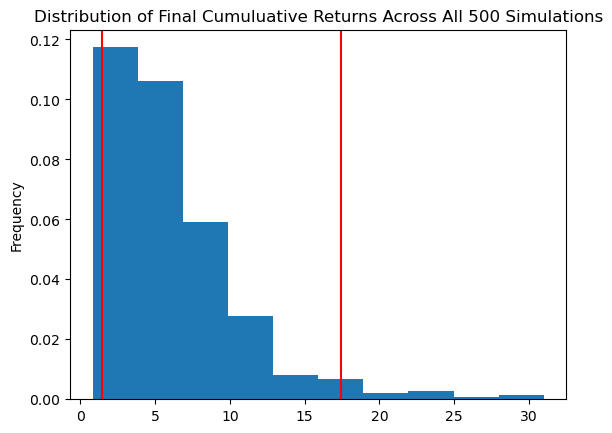

In [57]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_years.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.187758
std               4.345004
min               0.832641
25%               3.132529
50%               5.184612
75%               7.973754
max              30.987726
95% CI Lower      1.462647
95% CI Upper     17.424497
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [45]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $29252.95 and $348489.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*(20000 * 1.5),2)
ci_upper = round(tbl[9]*(20000 * 1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $43879.42 and $522734.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Display data
MC_five_years.portfolio_data.head()

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000637,0.994241,1.009296,1.008631,0.997473,1.012651,0.992448,1.004095,1.008030,1.000647,...,1.004336,1.006899,0.997912,0.985648,1.009773,1.007112,0.984472,1.015753,1.007210,1.004451
2,1.011705,0.994392,1.004683,1.010389,0.992921,1.011898,0.992544,1.002002,1.002566,1.006518,...,1.004402,1.016780,0.986276,0.988451,1.004659,0.995627,0.991542,1.004074,1.021175,1.021604
3,1.006390,1.001472,1.015230,1.020784,0.985680,1.025290,0.990660,1.010399,1.014216,1.001218,...,0.995904,1.016800,0.979898,1.001287,1.016207,0.988848,0.995387,0.995068,1.014867,1.014364
4,1.017969,0.999101,1.006362,1.017651,0.996370,1.023670,0.984301,1.017541,1.024026,1.002936,...,0.987249,1.035080,0.994760,0.996140,1.025280,0.994011,1.001679,0.995614,1.014420,1.003574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.820193,1.097262,1.323155,1.862977,0.796158,2.308254,1.593262,1.108687,2.019455,1.087744,...,1.639232,1.382225,1.453835,1.946802,0.917473,2.356047,1.151180,1.753017,1.252392,1.537902
1257,0.814191,1.103958,1.317992,1.863967,0.790199,2.299172,1.596689,1.118462,2.027301,1.080572,...,1.642088,1.372570,1.445310,1.954837,0.909667,2.340406,1.171979,1.724823,1.267949,1.550799
1258,0.813111,1.096976,1.310808,1.843199,0.779353,2.304671,1.601507,1.139714,2.060987,1.087405,...,1.620723,1.364565,1.446647,1.944517,0.899193,2.325781,1.164653,1.712210,1.251286,1.536338
1259,0.819949,1.085573,1.307558,1.867254,0.777984,2.363935,1.613346,1.144376,2.041949,1.090650,...,1.632295,1.383915,1.460533,1.956878,0.898593,2.353209,1.160850,1.744752,1.243123,1.533958


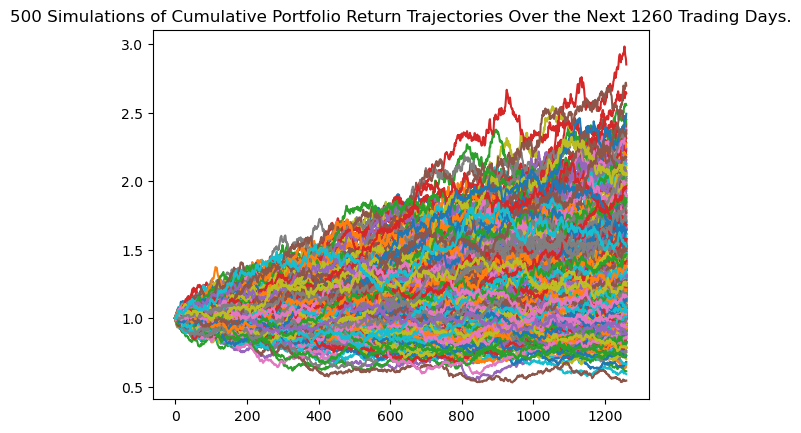

In [55]:
# Plot simulation outcomes
line_plot_five = MC_five_years.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

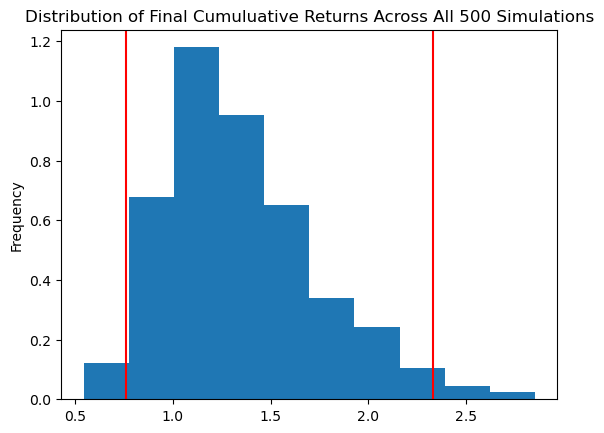

In [58]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_years.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.350236
std               0.394558
min               0.544744
25%               1.073876
50%               1.285918
75%               1.549192
max               2.851117
95% CI Lower      0.759501
95% CI Upper      2.330966
Name: 1260, dtype: float64


In [64]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*(60000),2)
ci_upper_five = round(tbl_five[9]*(60000),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45570.05 and $139857.97


### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Display data
MC_ten_years.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2018-07-12 04:00:00+00:00  106.26  106.420  106.2600  106.41  2145797   
2018-07-13 04:00:00+00:00  106.44  106.520  106.4400  106.51  2235587   
2018-07-16 04:00:00+00:00  106.35  106.400  106.2434  106.39  2116689   
2018-07-17 04:00:00+00:00  106.40  106.450  106.2900  106.35  2964110   
2018-07-18 04:00:00+00:00  106.36  106.385  106.2700  106.32  1760878   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-12 04:00:00+00:00        8401  106.365689          NaN  278.28   
2018-07-13 04:00:00+00:00        9524  106.486794     0.000940  279.17   
2018-07-16 04:00:00+00:00        8807  106.343343    -0.001127  279.64   
2018-07-17 04:00:00+00:00       10450  106.371231    -0.000376  278.47   
2018-07-18 04:00:00+00:00       14103  106.336028    -0.000282  280.56   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-07-12 04:00:00+00:00  279.430  277.60  279.29  60185206      236263   
2018-07-13 04:00:00+00:00  279.930  278.66  279.56  48259487      206152   
2018-07-16 04:00:00+00:00  279.803  278.84  279.39  48722138      177350   
2018-07-17 04:00:00+00:00  280.910  278.41  280.43  52890500      216883   
2018-07-18 04:00:00+00:00  281.180  280.06  281.06  45335061      169756   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-12 04:00:00+00:00  278.725115          NaN  
2018-07-13 04:00:00+00:00  279.527779     0.000967  
2018-07-16 04:00:00+00:00  279.312325    -0.000608  
2018-07-17 04:00:00+00:00  280.027102     0.003722  
2018-07-18 04:00:00+00:00  280.805105     0.002247

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003168,1.000502,1.011720,1.011898,1.000289,0.993807,1.007501,0.993305,1.011913,1.002584,...,1.004449,0.990722,0.999059,1.012424,0.995711,0.992837,1.005505,0.984399,1.018206,1.002485
2,0.989876,0.986940,1.004869,1.008508,1.013715,0.983369,1.008191,0.996348,1.022213,0.999625,...,1.006141,0.990968,1.002410,1.031325,0.996393,0.989150,1.008077,0.982636,1.020119,1.007868
3,1.003910,0.996637,1.004296,1.001515,1.017866,0.984393,0.995692,1.006172,1.026563,1.020897,...,1.022532,0.996605,1.004630,1.036458,0.994888,0.991854,1.007290,0.976239,1.010696,1.016869
4,0.987988,0.993897,0.993714,0.995137,0.996305,0.982771,0.998596,1.003929,1.020567,1.035612,...,1.026591,0.984662,1.007781,1.032622,0.998892,0.987967,1.005046,0.993522,1.009548,1.012073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.442549,1.821062,1.587218,1.586114,1.379303,3.076177,1.492125,1.461080,1.082377,0.848234,...,1.745314,1.201182,2.203952,1.710235,1.618889,3.276751,3.066460,1.530221,1.079022,2.624835
2517,1.444702,1.804351,1.573983,1.582655,1.372399,3.033362,1.504081,1.456053,1.072857,0.853115,...,1.732041,1.197963,2.203332,1.710401,1.611039,3.252590,3.069397,1.538682,1.093695,2.607956
2518,1.434567,1.818938,1.597435,1.589964,1.387525,3.033970,1.516625,1.455939,1.076023,0.841079,...,1.738825,1.192408,2.218326,1.711946,1.614430,3.310787,3.049176,1.521522,1.100031,2.572643
2519,1.431861,1.826907,1.586537,1.595035,1.378249,3.008857,1.517961,1.467561,1.089697,0.832769,...,1.756192,1.185982,2.211698,1.725951,1.617535,3.320905,3.067484,1.533208,1.083129,2.563045


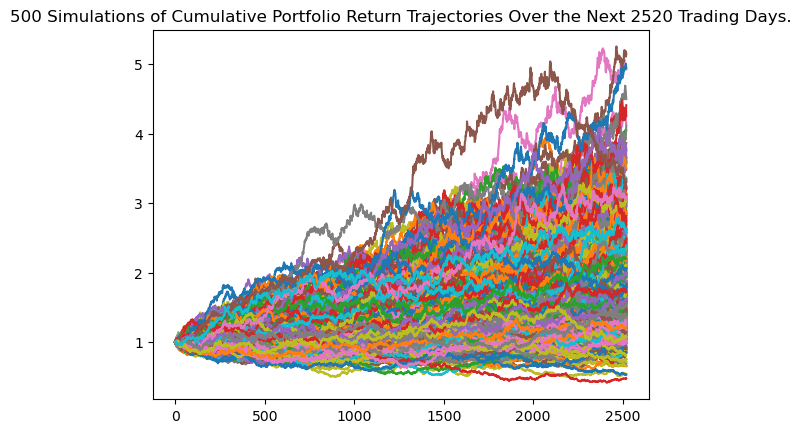

In [56]:
# Plot simulation outcomes
line_plot_ten = MC_ten_years.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

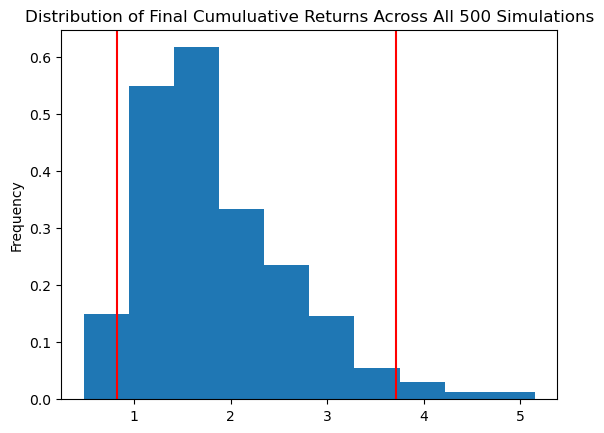

In [59]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_years.plot_distribution()

# Save the plot for future usage
dist_plot_ten.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.854845
std               0.773982
min               0.478804
25%               1.292300
50%               1.697631
75%               2.291452
max               5.152691
95% CI Lower      0.821872
95% CI Upper      3.711449
Name: 2520, dtype: float64


In [63]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*(60000),2)
ci_upper_ten = round(tbl_ten[9]*(60000),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $49312.34 and $222686.96
